In [1]:
# Imports
import os
import logging
import numpy as np
import xarray as xr

from eoreader.reader import Reader
from eoreader.bands import NDWI

In [2]:
def load_ndwi(prod, res):
    """
    Load NDWI index (and rename the array)
    """
    # Read NDWI index
    ndwi = prod.load(NDWI, resolution=res)[NDWI]
    ndwi_name = f"{ndwi.attrs['constellation']} NDWI"
    return ndwi.rename(ndwi_name)

def extract_water(ndwi):
    """
    Extract water from NDWI index (and rename the array)
    """
    # Assert water bodies when NDWI index > 0.2
    water = xr.where(ndwi > 0.2, 1, 0)

    # Set nodata where ndwi is nan.
    # WARNING: the function xr.DataArray.where sets by default np.nan where the condition is false !
    # See here: http://xarray.pydata.org/en/stable/generated/xarray.DataArray.where.html
    water = water.where(~np.isnan(ndwi))

    # Plot a subsampled version
    water_name = f"{ndwi.attrs['constellation']} WATER"
    water = water.rename(water_name)
    water.attrs["long_name"] = "Water detection"
    return water.rename(water_name)

In [3]:
logger = logging.getLogger("eoreader")
logger.setLevel(logging.DEBUG)

# create console handler and set level to debug
ch = logging.StreamHandler()
ch.setLevel(logging.DEBUG)

# create formatter
formatter = logging.Formatter('%(message)s')

# add formatter to ch
ch.setFormatter(formatter)

# add ch to logger
logger.addHandler(ch)

In [4]:
prod_folder = os.path.join("/home", "data", "DATA", "PRODS")
paths = [  
    # Landsat-8 OLI-TIRS collection 2
    os.path.join(prod_folder, "LANDSATS_COL2", "LC08_L1TP_200030_20201220_20210310_02_T1.tar"),
    # Landsat-5 TM collection 2    
    os.path.join(prod_folder, "LANDSATS_COL2", "LT05_L1TP_200030_20111110_20200820_02_T1.tar"),
    # Sentinel-2 L2A
    os.path.join(prod_folder, "S2", "PB 02.07+", "S2A_MSIL1C_20191215T110441_N0208_R094_T30TXP_20191215T114155.SAFE"),
]

In [5]:
# Create the reader
reader = Reader()

# Loop on all the products
water_arrays = []
ndwi_arrays = []
extents = []
for path in paths:
    logger.info(f"*** {os.path.basename(path)} ***")
    
    # Open the product
    prod = reader.open(path, remove_tmp=True)
    logger.info(prod)

    # Get extents
    extents.append(prod.extent())
    
    # Read NDWI index
    # Let's say we want a 60. meters resolution
    ndwi = load_ndwi(prod, res=60.)
    ndwi_arrays.append(ndwi)
    
    # Extract water
    water_arrays.append(extract_water(ndwi))
    logger.info("\n")

*** LC08_L1TP_200030_20201220_20210310_02_T1.tar ***


eoreader.LandsatProduct 'LC08_L1TP_200030_20201220_20210310_02_T1'
Attributes:
	condensed_name: 20201220T104856_L8_200030_OLI_TIRS
	path: /home/data/DATA/PRODS/LANDSATS_COL2/LC08_L1TP_200030_20201220_20210310_02_T1.tar
	constellation: Landsat-8
	sensor type: Optical
	product type: L1
	default resolution: 30.0
	acquisition datetime: 2020-12-20T10:48:56
	band mapping:
		COASTAL_AEROSOL: 1
		BLUE: 2
		GREEN: 3
		RED: 4
		NIR: 5
		NARROW_NIR: 5
		CIRRUS: 9
		SWIR_1: 6
		SWIR_2: 7
		THERMAL_IR_1: 10
		THERMAL_IR_2: 11
		PANCHROMATIC: 8
	needs extraction: False
	cloud cover: 16.36
	tile name: 200030


Loading bands ['GREEN', 'NIR']


Read GREEN


Converting GREEN to reflectance


Manage nodata for band GREEN


Read NIR


Converting NIR to reflectance


Manage nodata for band NIR


Loading indices ['NDWI']


*** LT05_L1TP_200030_20111110_20200820_02_T1.tar ***


eoreader.LandsatProduct 'LT05_L1TP_200030_20111110_20200820_02_T1'
Attributes:
	condensed_name: 20111110T103612_L5_200030_TM
	path: /home/data/DATA/PRODS/LANDSATS_COL2/LT05_L1TP_200030_20111110_20200820_02_T1.tar
	constellation: Landsat-5
	sensor type: Optical
	product type: L1
	default resolution: 30.0
	acquisition datetime: 2011-11-10T10:36:12
	band mapping:
		BLUE: 1
		GREEN: 2
		RED: 3
		NIR: 4
		NARROW_NIR: 4
		SWIR_1: 5
		SWIR_2: 7
		THERMAL_IR_1: 6
		THERMAL_IR_2: 6
	needs extraction: False
	cloud cover: 19.0
	tile name: 200030


Loading bands ['GREEN', 'NIR']


Read GREEN


Converting GREEN to reflectance


Manage nodata for band GREEN


Read NIR


Converting NIR to reflectance


Manage nodata for band NIR


Loading indices ['NDWI']


*** S2A_MSIL1C_20191215T110441_N0208_R094_T30TXP_20191215T114155.SAFE ***


eoreader.S2Product 'S2A_MSIL1C_20191215T110441_N0208_R094_T30TXP_20191215T114155'
Attributes:
	condensed_name: 20191215T110441_S2_T30TXP_L1C_114155
	path: /home/data/DATA/PRODS/S2/PB 02.07+/S2A_MSIL1C_20191215T110441_N0208_R094_T30TXP_20191215T114155.SAFE
	constellation: Sentinel-2
	sensor type: Optical
	product type: MSIL1C
	default resolution: 10.0
	acquisition datetime: 2019-12-15T11:04:41
	band mapping:
		COASTAL_AEROSOL: 01
		BLUE: 02
		GREEN: 03
		RED: 04
		VEGETATION_RED_EDGE_1: 05
		VEGETATION_RED_EDGE_2: 06
		VEGETATION_RED_EDGE_3: 07
		NIR: 8A
		NARROW_NIR: 08
		WATER_VAPOUR: 09
		CIRRUS: 10
		SWIR_1: 11
		SWIR_2: 12
	needs extraction: False
	cloud cover: 0.6668
	tile name: T30TXP


Loading bands ['GREEN', 'NIR']


Read GREEN


Converting GREEN to reflectance


Manage nodata for band GREEN


Read NIR


Converting NIR to reflectance


Manage nodata for band NIR


Loading indices ['NDWI']


/opt/conda/lib/python3.9/site-packages/cartopy/io/__init__.py:241: DownloadWarning: Downloading: https://naciscdn.org/naturalearth/10m/physical/ne_10m_coastline.zip
  warnings.warn('Downloading: {}'.format(url), DownloadWarning)


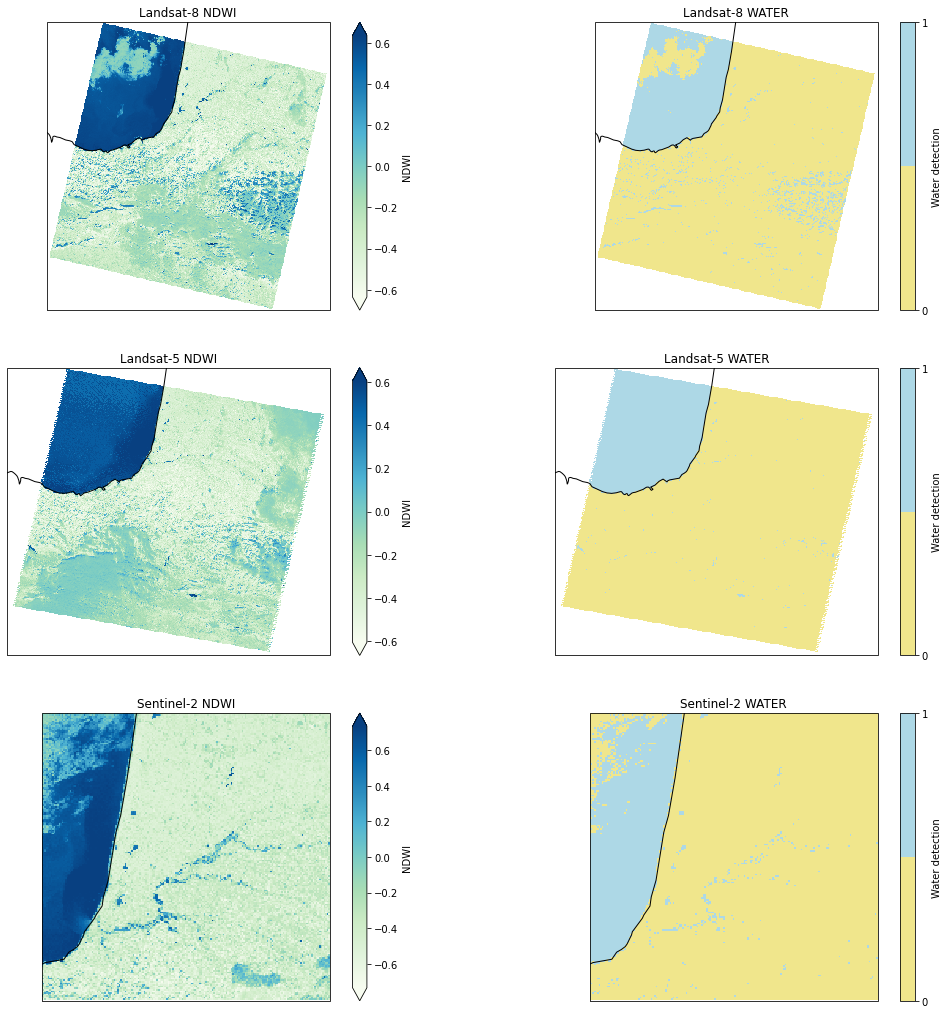

In [6]:
# Plot the tiles
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import cartopy.crs as ccrs
from shapely.errors import ShapelyDeprecationWarning
import warnings

warnings.filterwarnings("ignore", category=ShapelyDeprecationWarning)

nrows = len(paths)
plt.figure(figsize=(6 * nrows, 6 * nrows))
cmap = ListedColormap(['khaki', 'lightblue'])
for i in range(nrows):
    # Compute cartopy projection (EOReader always is in UTM)
    extent = extents[i]
    str_epsg = str(extent.crs.to_epsg())
    zone = str_epsg[-2:]
    is_south = str_epsg[2] == 7
    proj = ccrs.UTM(zone, is_south)

    # Get extent values
    # The extents must be defined in the form (min_x, max_x, min_y, max_y)
    bounds = extent.bounds
    extent_val = [bounds.minx[0], bounds.maxx[0], bounds.miny[0], bounds.maxy[0]]

    # Plot NDWI
    axes = plt.subplot(nrows, 2, 2*i+1, projection=proj)
    axes.set_extent(extent_val, proj)
    ndwi_arrays[i][0, ::10, ::10].plot.imshow(origin='upper', extent=extent_val, transform=proj, cmap="GnBu", robust=True)
    axes.coastlines(linewidth=1)
    axes.set_title(ndwi_arrays[i].name)
    
    # Plot water
    axes = plt.subplot(nrows, 2, 2*i+2, projection=proj)
    axes.set_extent(extent_val, proj)
    water_arrays[i][0, ::10, ::10].plot.imshow(origin='upper', extent=extent_val, transform=proj, cmap=cmap, cbar_kwargs={'ticks': [0, 1]})
    axes.coastlines(linewidth=1)
    axes.set_title(water_arrays[i].name)
    axes.set_title(water_arrays[i].name)